In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
# Define the functions
def sinusoidal(t):
    return np.sin(t)

def square_wave(t):
    return 1 if (t % (2 * np.pi)) < np.pi else 0

def triangular_wave(t):
    t_mod = t % (2 * np.pi)
    return 2 * t_mod / (2 * np.pi) if t_mod < np.pi else 2 * (2 * np.pi - t_mod) / (2 * np.pi)

# Choose the function you want to use
def f(t, choice='sinusoidal'):
    if choice == 'sinusoidal':
        return sinusoidal(t)
    elif choice == 'square_wave':
        return square_wave(t)
    elif choice == 'triangular_wave':
        return triangular_wave(t)
    else:
        raise ValueError("Invalid function choice")

# Define the differential equation
def model(x, t, gamma, choice):
    return gamma * (f(t, choice) - x)

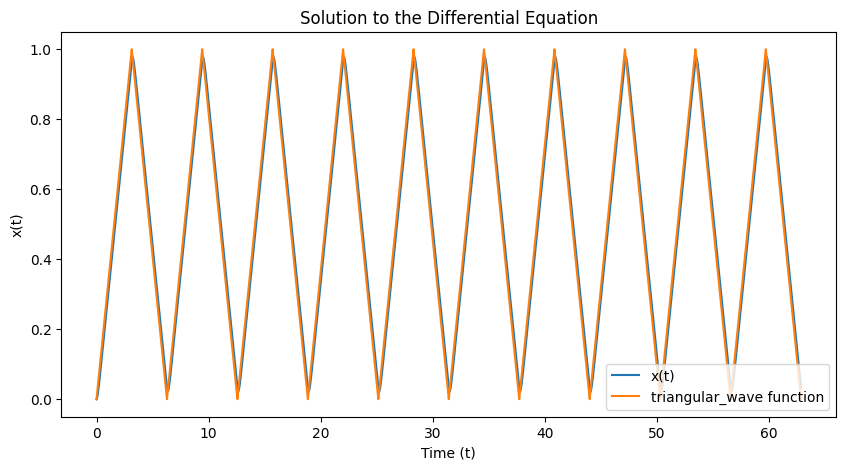

In [16]:
# Time points
t = np.linspace(0, 20*np.pi, 100000)

# Initial condition
x0 = 0

# Select the function type
function_choice = 'triangular_wave'  # Change to 'square_wave' or 'triangular_wave' as needed

# Define the parameter gamma
gamma = 10

# Solve the differential equation
x = odeint(model, x0, t, args=(gamma, function_choice))
# Calculate f(t) for plotting
f_values = np.array([f(time, function_choice) for time in t])

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(t, x, label='x(t)')
plt.plot(t, f_values, label=f'{function_choice} function' )
plt.xlabel('Time (t)')
plt.ylabel('x(t)')
plt.title('Solution to the Differential Equation')
plt.legend()

In [2]:
def model2D(u, t, gamma, K):
    x, y = u
    dx = gamma * (y - x)
    dy = K / (K + x) - y
    return [dx, dy]

def model1D(y, t, K):
    return K / (K + y) - y

In [19]:
t = np.linspace(0, 20, 10000)
K = 1
gamma = 10

x0 = 1
y0 = 0.1

y = odeint(model1D, y0, t, args=(K,))
x = y

u = odeint(model2D, [x0, y0], t, args=(gamma, K))

<bound method Figure.tight_layout of <Figure size 1000x1000 with 4 Axes>>

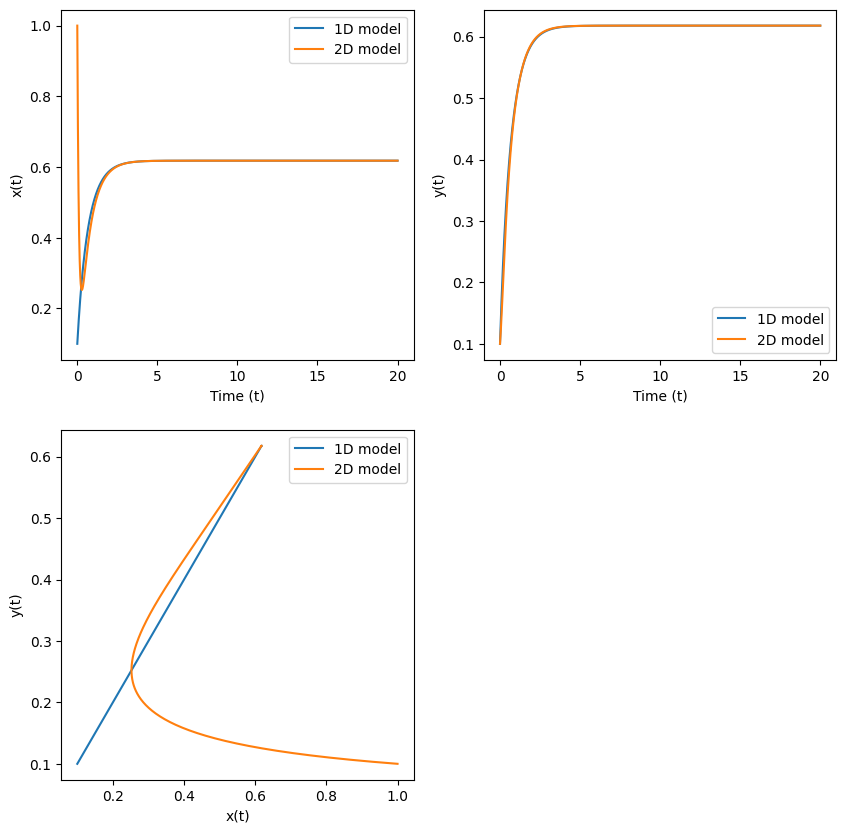

In [20]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0,0].plot(t, x, label='1D model')
ax[0,0].plot(t, u[:,0], label='2D model')
ax[0,0].set_xlabel('Time (t)')
ax[0,0].set_ylabel('x(t)')
ax[0,0].legend()

ax[0,1].plot(t, y, label='1D model')
ax[0,1].plot(t, u[:,1], label='2D model')
ax[0,1].set_xlabel('Time (t)')
ax[0,1].set_ylabel('y(t)')
ax[0,1].legend()

ax[1,0].plot(x, y, label='1D model')
ax[1,0].plot(u[:,0], u[:,1], label='2D model')
ax[1,0].set_xlabel('x(t)')
ax[1,0].set_ylabel('y(t)')
ax[1,0].legend()

ax[1,1].axis('off')
fig.tight_layout